# Stereo Images

In [1]:
import matplotlib.pyplot as plt

imA = plt.imread("StereoLeft.jpg")
imB = plt.imread("StereoRight.jpg")

## Setting up

In [2]:
import cameratransform as ct

cam1 = ct.Camera(ct.RectilinearProjection(focallength_px=3863.64, image=[4608, 2592]))
cam2 = ct.Camera(cam1.projection)

cam_group = ct.CameraGroup(cam1.projection, (cam1.orientation, cam2.orientation))

In [3]:
baseline = 0.87

In [4]:
cam1.tilt_deg = 90
cam1.heading_deg = 35
cam1.roll_deg = 0
cam1.pos_x_m = 0
cam1.pos_y_m = 0
cam1.elevation_m = 0

cam2.tilt_deg = 90
cam2.heading_deg = -18
cam2.roll_deg = 0
cam2.pos_x_m = baseline
cam2.pos_y_m = 0
cam2.elevation_m = 0

## Fitting

In [5]:
import numpy as np
corresponding1 = np.array([[1035.19720133, 1752.47539918], [1191.16681219, 1674.08229634], [1342.64515152, 1595.28089609], [1487.18243488, 1525.87033629], [1623.55377003, 1456.86807389], [1753.39234661, 1391.94878561], [1881.18943613, 1331.92906624], [2002.45376709, 1275.17572617], [2119.63512393, 1220.46387315], [2229.46712739, 1167.79350718], [1132.21312835, 1106.84930585], [ 902.38609626, 1016.70756572], [1594.61961207,  628.61640974], [1794.85813404,  704.30794726], [1791.41760961,  663.70975895], [1956.56278237,  634.80935372], [2121.70795513,  600.40410939], [2288.22933766,  571.50370416], [2439.61241269,  544.66761359], [2583.42633397,  517.14341813], [2736.18561877,  488.93111778], [2876.55901561,  462.7831321 ], [3010.05136359,  437.3232513 ], [3144.23181646,  413.92768515], [3270.84311557,  393.28453856], [3393.32578537,  369.88897242], [2688.73357512, 1033.7464922 ], [2885.97789523, 1144.56386559], [3068.37586866, 1053.89510554], [2870.60132189,  952.09158548], [3237.51817542,  641.90898531], [3288.95016212,  879.98075878], [4105.49922925,  943.60795881], [3965.51938917,  692.28051867], [4037.41700677, 1135.08413333], [3253.6366414 , 1071.87603935], [3769.95210584, 1204.30954628], [4207.84687809, 1265.15387253], [3808.67122255, 1451.37438621], [3587.10046207, 1264.66938952], [3639.1604923 , 1353.23128002]])
corresponding2 = np.array([[ 352.50914077,  801.67993473], [ 460.08683446,  810.68133359], [ 570.95772285,  820.12182507], [ 682.48725018,  829.56231656], [ 797.35908021,  838.80579923], [ 908.18086062,  848.66284585], [1020.80811952,  858.76197628], [1135.19174893,  870.61747721], [1249.57537835,  882.03388552], [1365.71537827,  893.45029383], [ 911.70331034,  537.73870329], [ 956.46082091,  454.7508191 ], [1718.73717286,  432.37206381], [1706.61534708,  518.62351648], [2062.64027012,  573.54205381], [2203.84185338,  600.78475058], [2355.65939432,  631.55257909], [2518.58129093,  665.72644033], [2673.15840747,  699.10556061], [2837.669786  ,  733.27942185], [3018.47335419,  768.64539453], [3202.45588621,  807.58770152], [3386.83578872,  844.9405266 ], [3584.72628753,  889.04864983], [3786.59049113,  932.3620321 ], [3991.63365858,  976.47015533], [2525.23601839, 1218.44516641], [2474.07408151, 1366.28811638], [2773.14569785, 1406.5405226 ], [2806.62667125, 1256.44042836], [3392.99303531, 1137.69520116], [2908.10263735, 1298.38150822], [3615.97183145, 1832.82274977], [4128.46912797, 1593.56296216], [3558.36872853, 2064.51618063], [2885.45082314, 1509.32652806], [3106.67717295, 1903.49557987], [3439.6617577 , 2276.44773767], [2628.22670423, 2051.78724561], [2789.70873377, 1806.36653735], [2665.39954766, 1885.90842814]])

cam_group.addPointCorrespondenceInformation(corresponding1, corresponding2)

In [6]:
trace = cam_group.metropolis([
        ct.FitParameter("C0_heading_deg", lower=0, upper=45, value=15),
        ct.FitParameter("C0_roll_deg", lower=-5, upper=5, value=0),
        ct.FitParameter("C1_tilt_deg", lower=45, upper=135, value=85),
        ct.FitParameter("C1_heading_deg", lower=-45, upper=0, value=-15),
        ct.FitParameter("C1_roll_deg", lower=-5, upper=5, value=0)
    ], iterations=1e6)

100%|████████████████████████████████████████| 1000000/1000000 [36:55<00:00, 451.28it/s, acc_rate=0.37, factor=0.00363]


In [7]:
trace[::100].to_csv("trace_stereo.csv", index=False)

In [8]:
import pandas as pd
trace = pd.read_csv("trace_stereo.csv")
cam_group.set_trace(trace)

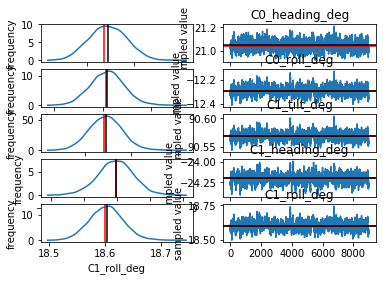

In [9]:
cam_group.plotTrace()

## Measuring

In [10]:
points1_start = np.array([[4186.75025841, 1275.33146571], [2331.92641872, 1019.27786453], [2001.20914719,  644.51861935], [1133.13081198, 1109.00803712], [ 900.20742144, 1016.83613865], [3287.47982902,  882.47189246], [3965.52607095,  693.78282123], [2689.04269923, 1033.94065467], [2889.82546079, 1144.44899631]])
points1_end = np.array([[3833.11271185, 1441.03505624], [2234.96105241, 1095.94815417], [2141.25664041,  614.81157533], [1797.43541128,  705.61811479], [1594.1321895 ,  630.02825115], [4107.48373669,  942.87002974], [3238.54411195,  640.438481  ], [2868.55390207,  951.44851233], [3070.37430064, 1053.65575788]])

points2_start = np.array([[3390.15132692, 2262.6779465 ], [2312.57037143, 1067.65991742], [2112.03817032,  583.67614881], [ 910.64487701,  538.92782709], [ 955.7855831 ,  454.96068822], [2907.87901391, 1297.11142789], [4125.81321176, 1596.76190514], [2524.07911816, 1219.84947435], [2472.59638039, 1365.81424465]])
points2_end = np.array([[2674.06029559, 2066.93032418], [2136.89506898, 1071.98893465], [2200.59552941,  598.28354825], [1706.9610645 ,  517.94260225], [1718.87393798,  432.45627336], [3612.29928906, 1832.37417555], [3393.60277139, 1137.62004484], [2807.91089842, 1255.11024902], [2773.34835691, 1405.2303788 ]])


In [11]:
points_start_3D = cam_group.spaceFromImages(points1_start, points2_start)
points_end_3D = cam_group.spaceFromImages(points1_end, points2_end)

distances = np.linalg.norm(points_end_3D-points_start_3D, axis=-1)
print(distances)

[0.13885105 0.04962405 0.03691601 0.21049065 0.21220163 0.21331054
 0.21138547 0.07524718 0.0751257 ]


In [12]:
# the first distance is known to be 14cm
scale = 0.14/distances[0]
# we use this ratio to scale the space
cam_group.scaleSpace(scale)